# Instagram Project

## Steps :
1. Read Data and understand its shape and summery
2. Clean Data from (null values - duplicates - data types)
3. Explore Data and find answers for these questions :
   - top posts ?
   - relation between `likes` , `views` and `comments` ?
   - which `Hashtags` and `captions` make the best reacts ?
4. visualization of data by charts

In [57]:
import pandas as pd

### 1- read data from CSV file
- Column names
- Number of rows
- Data types
- And some initial values.

In [58]:
df = pd.read_csv('data/Instagram data.csv', encoding='latin1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [60]:
df.shape

(119, 13)

In [61]:
df.columns.to_list()

['Impressions',
 'From Home',
 'From Hashtags',
 'From Explore',
 'From Other',
 'Saves',
 'Comments',
 'Shares',
 'Likes',
 'Profile Visits',
 'Follows',
 'Caption',
 'Hashtags']

### 2- Data Cleaning and Preprocessing
- We check for missing values ​​(NaN).
- We verify that the column numbers are indeed numbers.
- We check for zeros or illogical values ​​(like showing no likes).
- We check for duplicate entries in the rows.

In [62]:
# null values in each column
df.isnull().sum()


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [63]:
# statistical summary of numerical columns
df.describe().sum()

Impressions       63420.771701
From Home         25444.676264
From Hashtags     20191.374048
From Explore      22397.126972
From Other         3443.523468
Saves              1888.628655
Comments            166.208442
Shares              235.950549
Likes              1472.660459
Profile Visits      951.710250
Follows             470.677882
dtype: float64

In [64]:
# make numeric clumns list numbers 
numeric_cols = ['Impressions','From Home','From Hashtags','From Explore','From Other',
                'Saves','Comments','Shares','Likes','Profile Visits','Follows']

df[numeric_cols]= df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [65]:
# remove duplicates
df = df.drop_duplicates()
df = df.dropna(subset=numeric_cols)

In [66]:
# show cleaned data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     102 non-null    int64 
 1   From Home       102 non-null    int64 
 2   From Hashtags   102 non-null    int64 
 3   From Explore    102 non-null    int64 
 4   From Other      102 non-null    int64 
 5   Saves           102 non-null    int64 
 6   Comments        102 non-null    int64 
 7   Shares          102 non-null    int64 
 8   Likes           102 non-null    int64 
 9   Profile Visits  102 non-null    int64 
 10  Follows         102 non-null    int64 
 11  Caption         102 non-null    object
 12  Hashtags        102 non-null    object
dtypes: int64(11), object(2)
memory usage: 11.2+ KB


### 3- Engagement Analysis
- Which type of post receives the most likes or comments?
- Is there a correlation between saves and follows?
- Do posts with many hashtags get more views?

In [67]:
# create new column 'Engagement' as sum of Likes, Comments, Shares, Saves
df['Engagement'] = df['Likes'] + df['Comments'] + df['Shares'] + df['Saves']

# show first 5 rows with new column
top_posts = df.sort_values(by='Engagement', ascending=False).head(5)

top_posts[['Caption','Likes', 'Comments', 'Shares', 'Saves', 'Engagement']]

,Caption,Likes,Comments,Shares,Saves,Engagement
117,Here are some of the best data science certifi...,549,2,75,1095,1721
118,175 Python Projects with Source Code solved an...,443,5,26,653,1127
49,Here are some of the best websites that you ca...,328,8,41,668,1045
114,Here are some of the best data science certifi...,373,2,38,573,986
109,Here are some of the best resources to learn S...,308,3,23,504,838


In [68]:
# correlation between saves and follows
correlation = df['Saves'].corr(df['Follows'])
correlation.round(2)

np.float64(0.65)

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

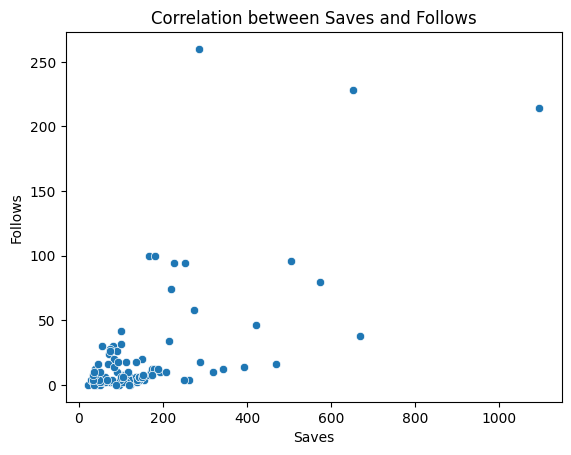

In [70]:
sns.scatterplot(data=df, x='Saves', y='Follows')
plt.title('Correlation between Saves and Follows')  
plt.xlabel('Saves')
plt.ylabel('Follows')
plt.show()

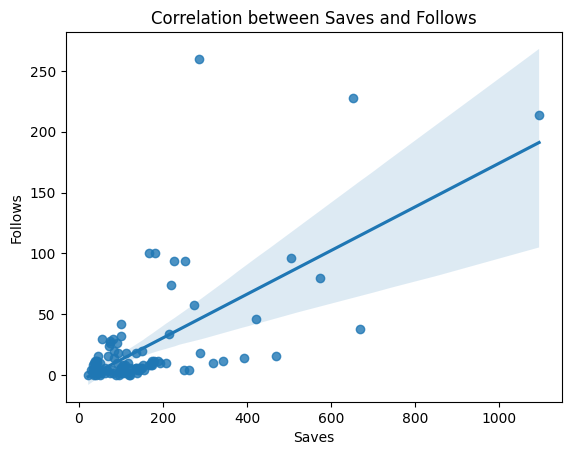

In [71]:
sns.regplot(data=df, x='Saves', y='Follows')
plt.title('Correlation between Saves and Follows')  
plt.xlabel('Saves')
plt.ylabel('Follows')
plt.show()

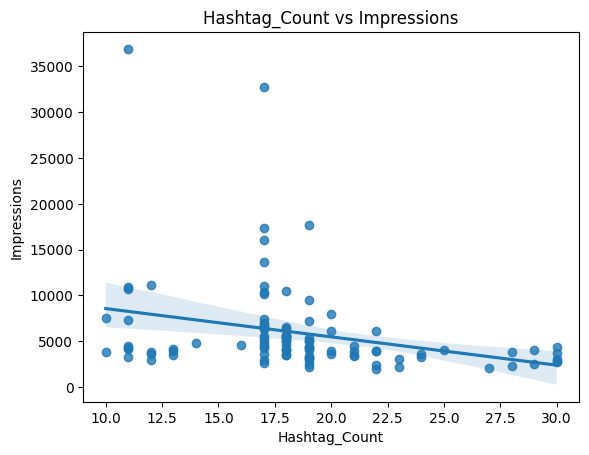

In [72]:
# posts with many hashtags get more views
# create new column 'Hashtag Count' as number of hashtags in caption
df['Hashtag_Count'] = df['Hashtags'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
sns.regplot(data=df,x='Hashtag_Count', y='Impressions')
plt.title('Hashtag_Count vs Impressions')  
plt.xlabel('Hashtag_Count') 
plt.ylabel('Impressions')
plt.show()

In [73]:
corr_hashtags = df['Hashtag_Count'].corr(df['Impressions'])
corr_hashtags.round(2)

np.float64(-0.29)

In [74]:
# show word which used most in captions
from collections import Counter
import re

top_posts = df.sort_values(by='Engagement', ascending=False).head(20)

all_captions = " ".join(top_posts['Caption'].astype(str))

words = re.findall(r'\b\w+\b', all_captions.lower())
common_words = Counter(words).most_common(10)

print("Most common words in top 20 posts captions:")
for word, freq in common_words:
    print(f"{word}: {freq}")


Most common words in top 20 posts captions:
the: 19
here: 18
of: 16
data: 16
you: 16
in: 16
to: 16
are: 14
science: 14
that: 13


1. Which type of post receives the most likes or comments?
   - the posts which have words like : data and science

2. Is there a correlation between saves and follows?
   - yes , it's 0.65 . more saves couse more follows

3. Do posts with many hashtags get more views?
   - No , the correlation is -0.29 . more hashtags couse less views

### Reach Analysis (Impressions/Reach) 
1. (From Home vs. From Hashtags vs. From Explore) Where does most reach originate?

2. Is there a correlation between Impressions and Visits Profile?

In [75]:
sources = ['From Home', 'From Hashtags', 'From Explore']
df[sources].sum()

From Home        254685
From Hashtags    200765
From Explore     120214
dtype: int64

In [76]:
mean_sources = df[sources].mean()
mean_sources

From Home        2496.911765
From Hashtags    1968.284314
From Explore     1178.568627
dtype: float64

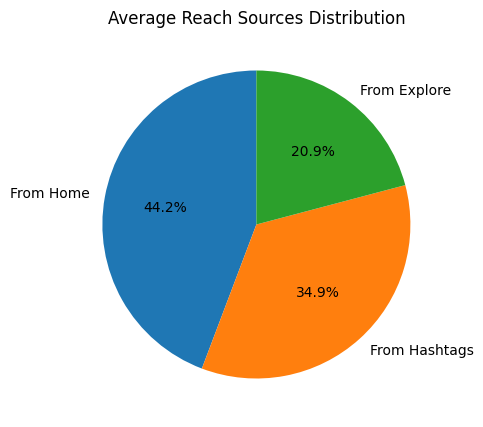

In [77]:
plt.figure(figsize=(8,5))
plt.pie(mean_sources, labels=mean_sources.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Reach Sources Distribution')
plt.show()

In [78]:
# correlation between Impressions and Visits Profile
corr_impressions_visits = df['Impressions'].corr(df['Profile Visits'])
corr_impressions_visits.round(2)

np.float64(0.76)

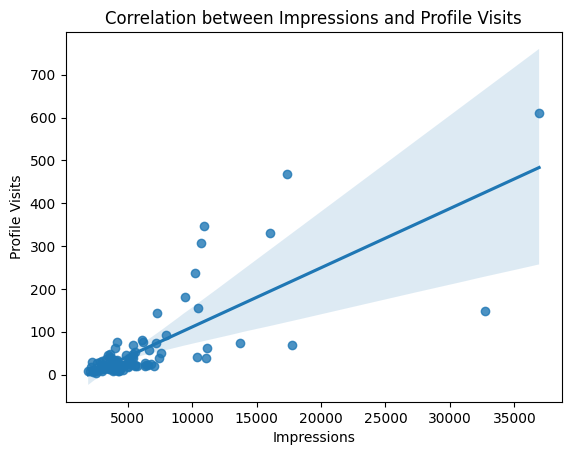

In [79]:
sns.regplot(data=df, x='Impressions', y='Profile Visits')
plt.title('Correlation between Impressions and Profile Visits')
plt.xlabel('Impressions')
plt.ylabel('Profile Visits')
plt.show()

1. (From Home vs. From Hashtags vs. From Explore) Where does most reach originate?
    - most reach originate is From Home so if we want to reach more views increase hashtags and explore
    
2. Is there a correlation between Impressions and Visits Profile?
    - yes , it's 0.76 . more profile visits couse more impressions

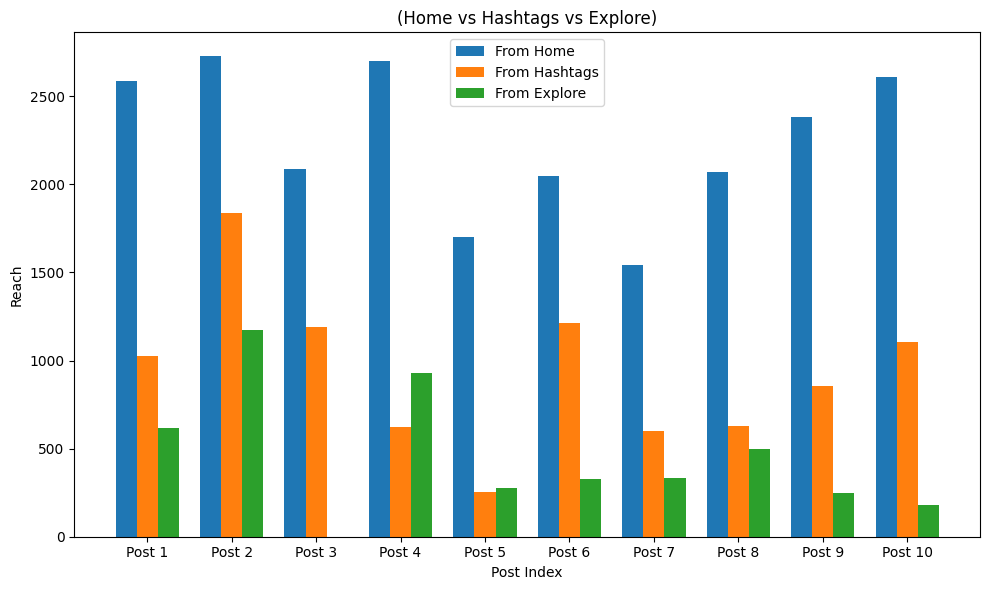

In [80]:
import numpy as np

# نختار أول 10 بوستات علشان الرسم يبقى واضح
posts = df.head(10)

# نحدد مواقع الأعمدة
x = np.arange(len(posts))
width = 0.25  # عرض العمود

plt.figure(figsize=(10,6))

# نرسم الأعمدة لكل مصدر
plt.bar(x - width, posts['From Home'], width, label='From Home')
plt.bar(x, posts['From Hashtags'], width, label='From Hashtags')
plt.bar(x + width, posts['From Explore'], width, label='From Explore')

# تنسيق الرسم
plt.xlabel("Post Index")
plt.ylabel("Reach")
plt.title("(Home vs Hashtags vs Explore)")
plt.xticks(x, [f"Post {i}" for i in range(1, len(posts)+1)])
plt.legend()
plt.tight_layout()
plt.show()


### Marketing Analysis
1. What type of post brings in the most new followers?
    - posts that provide learning or motivation bring new followers
    
2. Does a long caption positively or negatively affect engagement?
    - yes , it couses a little negatively affect engagement

3. Which hashtags perform best in reaching users on Explore?
    - #amankharwal: 20
    - #thecleverprogrammer: 20
    - #pythonprojects: 16
    - #machinelearning: 15
    - #python: 15
    - #pythonprogramming: 15
    - #datascience: 14
    - #dataanalysis: 14
    - #dataanalytics: 14
    - #datascientist: 14

In [81]:
# most posts bring new followers
top_posts_followers = df.sort_values(by='Follows', ascending=False).head(5)
top_posts_followers[['Caption' , 'Hashtags' ,'Follows']]

,Caption,Hashtags,Follows
107,Here is a list of 100+ Machine Learning Algori...,#machinelearning #machinelearningalgorithms #d...,260
118,175 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...,228
117,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...,214
113,Practice these 90+ Data Science Projects For B...,#datascience #datasciencejobs #datasciencetrai...,100
22,Learn how to send automatic emails using the P...,#python #pythonprogramming #pythonprojects #py...,100


In [82]:
# correlation between caption length and engagement
df['Caption_Length'] = df['Caption'].astype(str).apply(lambda x: len(x.split()))
df['Engagement'] = df['Likes'] + df['Comments'] + df['Shares'] + df['Saves']
corr_caption_engagement = df['Caption_Length'].corr(df['Engagement'])
corr_caption_engagement.round(2)

np.float64(-0.19)

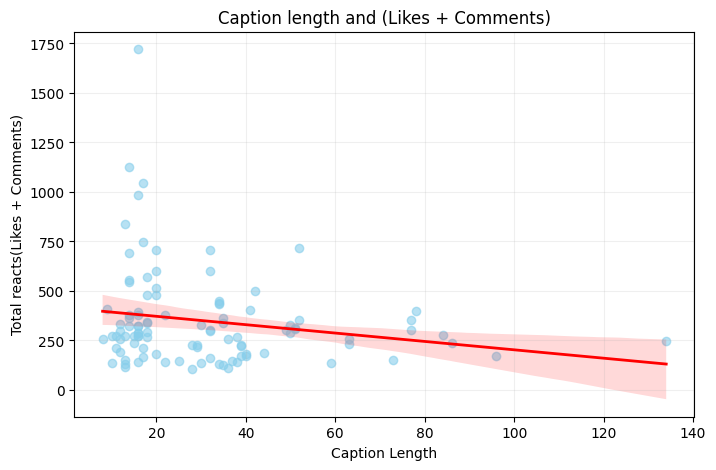

In [83]:
plt.figure(figsize=(8,5))
sns.regplot(
    x='Caption_Length',
    y='Engagement',
    data=df,
    scatter_kws={'alpha':0.6, 'color':'skyblue'},
    line_kws={'color':'red', 'lw':2}
)

plt.title("Caption length and (Likes + Comments)", fontsize=12)
plt.xlabel("Caption Length")
plt.ylabel("Total reacts(Likes + Comments)")
plt.grid(alpha=0.2)
plt.show()

In [84]:
# hashtags perform best in reaching users on Explore
hashtags_posts = df[df['Hashtags'].notna() & (df['Hashtags'] != '')]
top_explore = hashtags_posts.sort_values(by='From Explore', ascending=False).head(20)
top_explore[['Hashtags', 'From Explore']]

,Hashtags,From Explore
117,#datascience #datasciencejobs #datasciencetrai...,17414
118,#python #pythonprogramming #pythonprojects #py...,16444
109,#sql #mysql #datascience #datasciencejobs #dat...,12389
113,#datascience #datasciencejobs #datasciencetrai...,6000
112,#python #pythonprogramming #pythoncode #python...,5762
105,#data #datascience #dataanalysis #dataanalytic...,5634
114,#datascience #datasciencejobs #datasciencetrai...,5352
107,#machinelearning #machinelearningalgorithms #d...,5192
49,#data #datascience #dataanalysis #dataanalytic...,2355
115,#machinelearning #machinelearningalgorithms #d...,2266


In [85]:
hashtags = " ".join(top_explore['Hashtags'].astype(str))
tags = re.findall(r'#\w+', hashtags.lower())
top_tags = Counter(tags).most_common(10)

print("The most hashtags related to top Explore:")
for tag, freq in top_tags:
    print(f"{tag}: {freq}")

The most hashtags related to top Explore:
#amankharwal: 20
#thecleverprogrammer: 20
#pythonprojects: 16
#machinelearning: 15
#python: 15
#pythonprogramming: 15
#datascience: 14
#dataanalysis: 14
#dataanalytics: 14
#datascientist: 14


C:\Users\Dubai Key\AppData\Local\Temp\ipykernel_8468\1455796354.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x='Count', y='Hashtag', palette="viridis")  # y بدل x للبار الأفقي


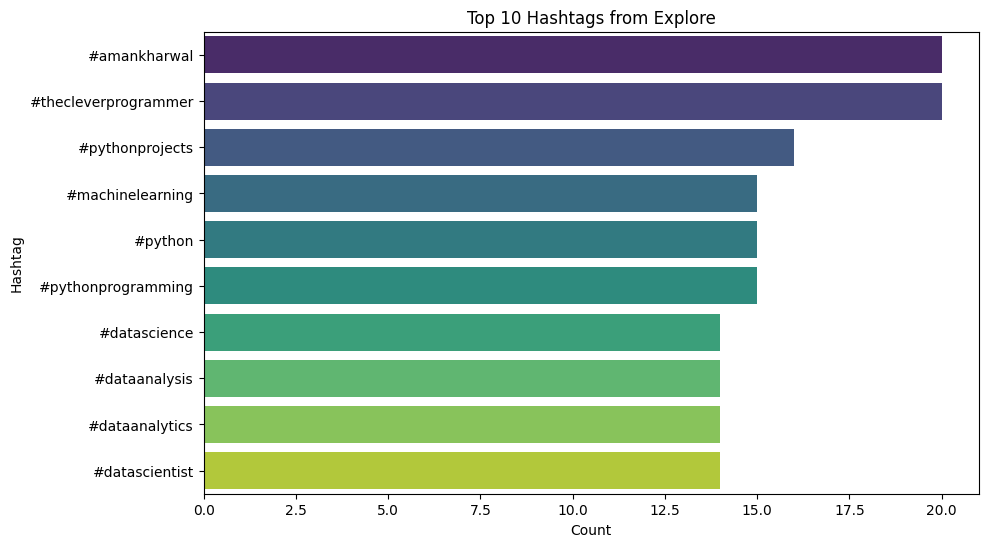

In [90]:
# تحويل top_tags لقائمة من الهاشتاجات والتكرار
tags, freqs = zip(*top_tags)  # يفك كل tuple لجزئين: tag و freq
df_top = pd.DataFrame({'Hashtag': tags, 'Count': freqs})

# رسم بار أفقي
plt.figure(figsize=(10,6))
sns.barplot(data=df_top, x='Count', y='Hashtag', palette="viridis")  # y بدل x للبار الأفقي
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.title("Top 10 Hashtags from Explore")
plt.show()

In [ ]:
# relations betwen share and profile visits
corr_shares_visits = df['Shares'].corr(df['Profile Visits'])
corr_shares_visits.round(2)

np.float64(0.27)

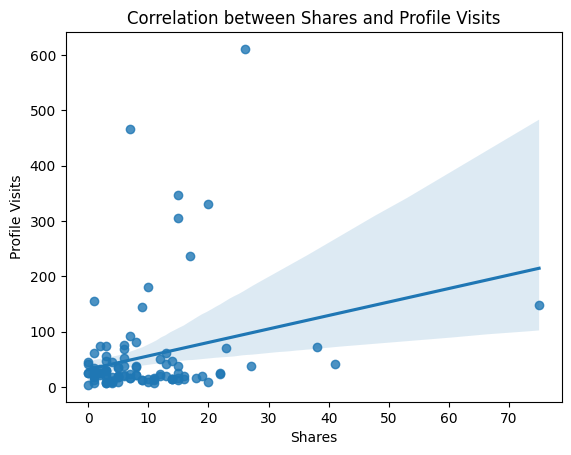

In [ ]:
sns.regplot(data=df, x='Shares', y='Profile Visits')
plt.title('Correlation between Shares and Profile Visits')
plt.xlabel('Shares')
plt.ylabel('Profile Visits')
plt.show()

In [ ]:
df.columns.to_list()

['Impressions',
 'From Home',
 'From Hashtags',
 'From Explore',
 'From Other',
 'Saves',
 'Comments',
 'Shares',
 'Likes',
 'Profile Visits',
 'Follows',
 'Caption',
 'Hashtags',
 'Engagement',
 'Hashtag Count',
 'Hashtag_Count',
 'Caption_Length']

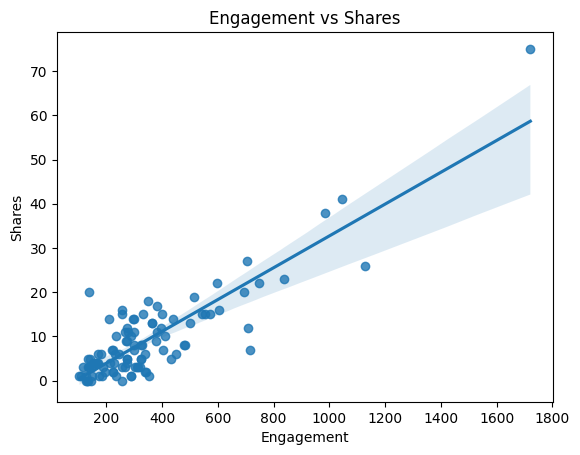

In [96]:
sns.regplot(data=df, x='Engagement', y='Shares')
plt.title('Engagement vs Shares')
plt.xlabel('Engagement')
plt.ylabel('Shares')
plt.show()